In [763]:
id1 = "316540467"
id2 = "316365733 "

name_student_1 = "Ameer Faour"
name_student_2 = "Eden Duktzayev"

import pandas as pd
import numpy as np
import seaborn as sns
df = pd.DataFrame([id1,id2])
# Uncomment in case two students are doing the assignment together
df = pd.DataFrame([id1])
#df = pd.DataFrame([id1,id2])
df.to_clipboard(index=False,header=False)

---

we open the file and we it in tube_file , and we used head to show the first 5 rows

In [774]:
tube_file=pd.read_csv("https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/youtube/youtube_US_short.csv")
tube_file.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


---
#### q1 
we saved the relevant columns,and then we used idxmax to find the index with the maximum views and then saved the index, and finally we used iloc to show what we saved.


In [765]:
the_wanted_index=tube_file[["title","views","publish_time"]]
num_row=tube_file["views"].idxmax()
the_wanted_index.iloc[[num_row]]


,title,views,publish_time
6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,149376127,2017-12-06T17:58:51.000Z


---
#### q2 
1) we used groupby to bring all the maximum views in every channel , the title is channel_title and views  
2) the groupby is not sorted by greater views, so we used sort_values without ascending so it starts from great to small  
3) we add head(3) to show the top 3 channels

In [766]:
max_channel_views=tube_file.groupby("channel_title")[["views"]].max()
top_3_channels=max_channel_views.sort_values('views', ascending=False).head(3)
top_3_channels


,views
channel_title,
YouTube Spotlight,149376127
LuisFonsiVEVO,102012605
Marvel Entertainment,91933007


---
#### q3 
we used correlation by spearman on the "likes","dislikes","views","comment_count"

In [767]:
corr_tube=tube_file[["likes","dislikes","views","comment_count"]].corr(method='spearman')
corr_tube

,likes,dislikes,views,comment_count
likes,1.000000,0.801154,0.877789,0.881849
dislikes,0.801154,1.000000,0.866979,0.843331
views,0.877789,0.866979,1.000000,0.840532
comment_count,0.881849,0.843331,0.840532,1.000000


---
#### q4 
we used style.background_gradient function to creat heatmap using pandas (we can also use seaborn)

heatmap=corr_tube.style.background_gradient(cmap='coolwarm')
heatmap

---
#### q5
##### We showed it step by step so you can understand it very well.

1) taking the corr and stack and change the values to columns so we can work with the series it and sorting the values by smallest to greater



In [768]:
stacking_and_sorting=corr_tube[:].stack().sort_values()
stacking_and_sorting

likes          dislikes         0.801154
dislikes       likes            0.801154
views          comment_count    0.840532
comment_count  views            0.840532
dislikes       comment_count    0.843331
comment_count  dislikes         0.843331
dislikes       views            0.866979
views          dislikes         0.866979
likes          views            0.877789
views          likes            0.877789
likes          comment_count    0.881849
comment_count  likes            0.881849
likes          likes            1.000000
dislikes       dislikes         1.000000
views          views            1.000000
comment_count  comment_count    1.000000
dtype: float64

2) get rid of all the double values (likes>dislike and dislike>likes ---->get rid of one of them)

In [769]:
without_duplicates=stacking_and_sorting.drop_duplicates()
without_duplicates

likes     dislikes         0.801154
views     comment_count    0.840532
dislikes  comment_count    0.843331
          views            0.866979
likes     views            0.877789
          comment_count    0.881849
          likes            1.000000
dtype: float64

3) taking the 2 largest values using nlargest function , but taking it without number 1 because number 1 is a douple corr from the same title (thats why we used [0:-1])

In [776]:
largest_corr=without_duplicates[0:-1].nlargest(2)
largest_corr

likes  comment_count    0.881849
       views            0.877789
dtype: float64

4) taking the keys to set x and y (x=likes  y=comment_count)

In [780]:
first_corr_title=largest_corr.keys()[0]
second_corr_title=largest_corr.keys()[1]
first_corr_title,second_corr_title

(('likes', 'comment_count'), ('likes', 'views'))

5) making the seaborn scatterplot and taking likes as x and comment_count as y 
using subplot to create multiple plots  
explain the function >>>>>>>>>>>  
plt.subplot(1,2,1) > create a 1X2 (first two numbers) plot and it will be plot number 1 (last number)  
plt.subplot(1,2,1) > create a 1X2 (first two numbers) plot and it will be plot number 2 (last number)

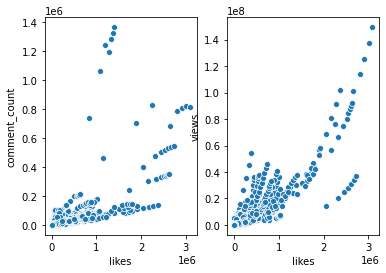

In [807]:
plt.subplot(1,2,1)
scatterplot=sns.scatterplot(data=tube_file,x=first_corr_title[0],y=first_corr_title[1])
plt.subplot(1,2,2)
scatterplot=sns.scatterplot(data=tube_file,x=second_corr_title[0],y=second_corr_title[1])


----------
#### q6
1) we add year column  
2) saving all rows that contain years 2018 or ( | ) 2017  
3) creating a table with pivot_table function by category_id and cloumns year and we did a sum to the values of views

In [773]:
tube_file['year'] = pd.DatetimeIndex(tube_file.publish_time).year
show_by_year=tube_file[(tube_file.year==2018) | (tube_file.year==2017)]
show_by_year
show_by_year.pivot_table("views",index='category_id',columns="year",aggfunc=np.sum)


year,2017,2018
category_id,,
1,8.654615e+08,144072937.0
2,7.885352e+07,8047346.0
10,4.504741e+09,839810930.0
15,1.442459e+08,32629265.0
17,3.812432e+08,61660329.0
19,5.429144e+07,7583452.0
20,5.035442e+07,84176667.0
22,7.018258e+08,67849434.0
23,1.130782e+09,197147385.0
